In [8]:
import pandas as pd
import time
import matplotlib.pyplot as plt 
from datetime import date, timedelta, datetime
years = 3.2
fiveyears = datetime.now() - timedelta(days=(years*365))
curr_timestamp = str(int(datetime.now().timestamp()))
fiveyears_timestamp = str(int(fiveyears.timestamp()))
#print('StartDate : {1}   EndDate: {0}'.format(curr_timestamp, fiveyears_timestamp))
print('StartDate : {0}   EndDate: {1}'.format(time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(fiveyears_timestamp))), 
                                              time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(curr_timestamp)))))
#time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1347517370))

url = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=' + fiveyears_timestamp + '&period2=' + curr_timestamp + '&interval=1d&events=history'
nifty = pd.read_csv(url)

url = 'https://query1.finance.yahoo.com/v7/finance/download/ICICINIFTY.NS?period1=' + fiveyears_timestamp + '&period2=' + curr_timestamp + '&interval=1d&events=history'
niftyetf = pd.read_csv(url)




#nifty = pd.read_csv('NIFTY.csv')
#niftyetf = pd.read_csv('ICICINIFTY.NS.csv')



StartDate : 2017-01-10 13:21:12   EndDate: 2020-03-23 13:21:12


In [9]:
def massage_df(df, dtformat):
    df = df[['Date','Close']]
    df['Date'] = df['Date'].apply(lambda x : datetime.strptime(str(x), dtformat).date())
    df.index = df['Date']
    df.drop(['Date'], axis=1, inplace=True)
    df.dropna(how='all', inplace=True)
    return df

In [67]:
niftynew = massage_df(nifty,  '%Y-%m-%d')
#niftyetfnew = massage_df(niftyetf,  '%m/%d/%Y')
niftyetfnew = massage_df(niftyetf,  '%Y-%m-%d')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

In [68]:


niftynew['Close'] = niftynew['Close'] / 100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
#print(niftynew.head())
#print(niftyetfnew.head())

df = pd.merge(niftynew,niftyetfnew,on='Date',how='inner')
df.rename(columns={"Close_x": "NIFTY", "Close_y": "ETF"}, inplace=True)
df['Variance'] = 0





In [70]:
from nsetools import Nse
nse = Nse()


In [83]:
niftyprice = 7780 #nse.get_index_quote('NIFTY 50')['lastPrice'] #8263 
etfprice = 83.05
niftydate = datetime.now().date()
df = df[-20::]

In [84]:
df_new = pd.DataFrame([(niftyprice / 100, etfprice, 0)], index = [niftydate] , columns=df.columns)
#df = pd.concat([df, df_new])

In [85]:

df['Variance'] = ((df['ETF'] - df['NIFTY']) / df['ETF']) * 1000

#print(df.head())

0.060624875408228585


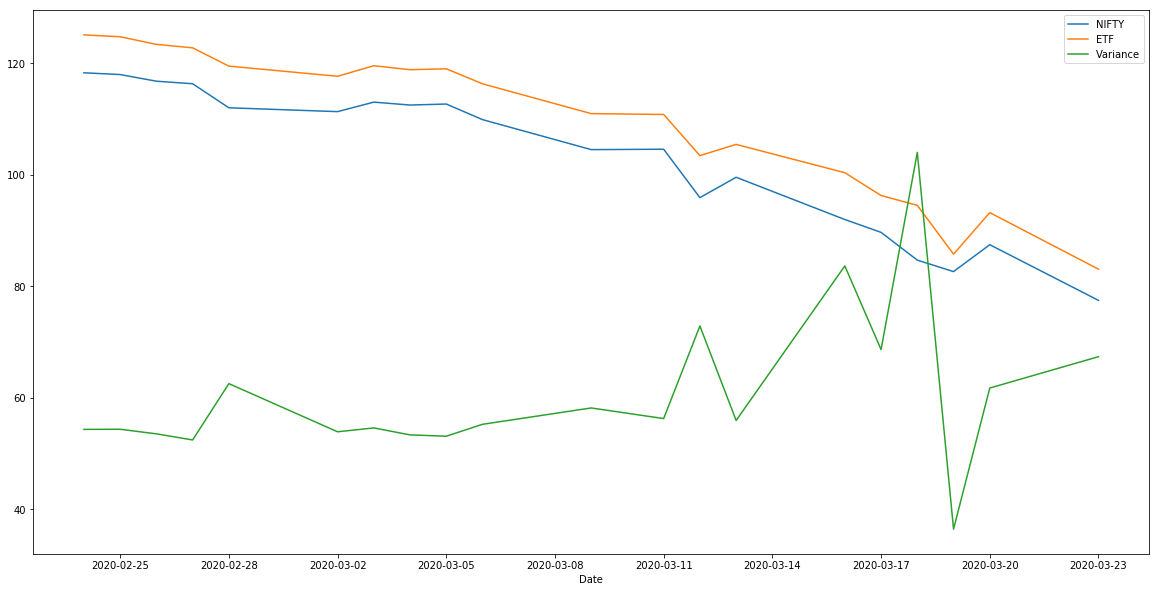

In [86]:
print(df['Variance'].mean() / 1000)

plt.rcParams["figure.figsize"] = (20,10)
df.plot()


In [54]:
df.to_csv('output.csv',header=True, sep=',', index=True)